In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
import pickle

In [4]:
x_treino, x_teste, y_treino, y_teste = pd.read_pickle('dados.pkl')

In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_treino, y_treino)
rf_pred = rf.predict(x_teste)

print(classification_report(y_teste, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



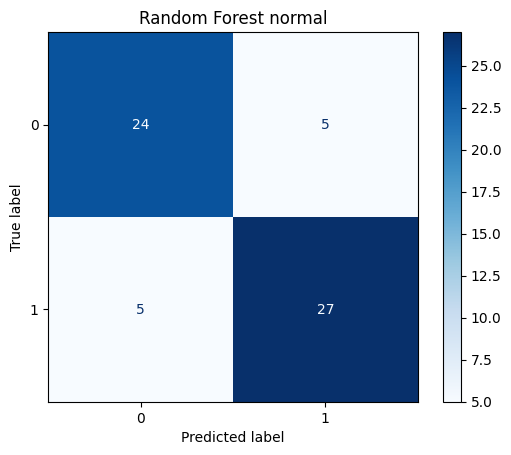

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


cm = confusion_matrix(y_teste, rf_pred)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest normal")
plt.show()

In [7]:
accuracy_score(y_teste, rf_pred)

In [24]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_teste, rf_pred).ravel()

In [8]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [9]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

rf_random = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf_random, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)

random_search.fit(x_treino, y_treino)
rf_random_best = random_search.best_estimator_

y_pred_random_search = rf_random_best.predict(x_teste)

In [10]:
print(classification_report(y_teste, y_pred_random_search))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [11]:
accuracy_score(y_teste, y_pred_random_search)

In [25]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_teste, y_pred_random_search).ravel()

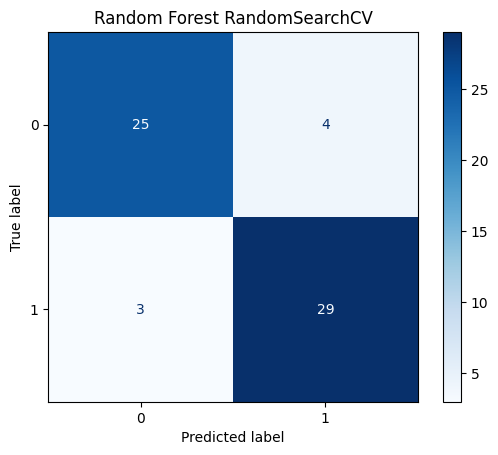

In [12]:
cm = confusion_matrix(y_teste, y_pred_random_search)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest RandomSearchCV")
plt.show()

In [13]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_grid = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_grid, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_treino, y_treino)

tree = grid_search.best_estimator_
y_pred_grid = tree.predict(x_teste)

In [14]:
print(classification_report(y_teste, y_pred_grid))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [15]:
accuracy_score(y_teste, y_pred_grid)

In [26]:
tn3, fp3, fn3, tp3 = confusion_matrix(y_teste, y_pred_random_search).ravel()

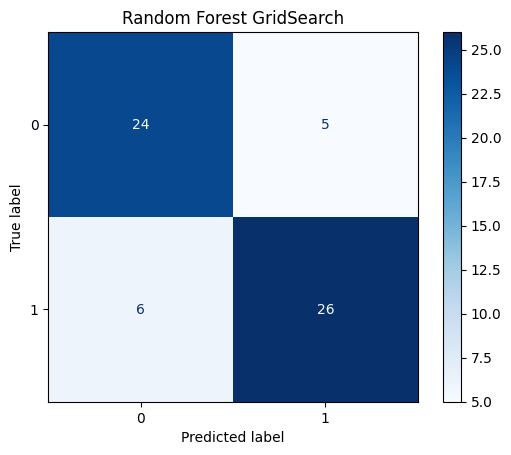

In [16]:
cm = confusion_matrix(y_teste, y_pred_grid)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest GridSearch")
plt.show()

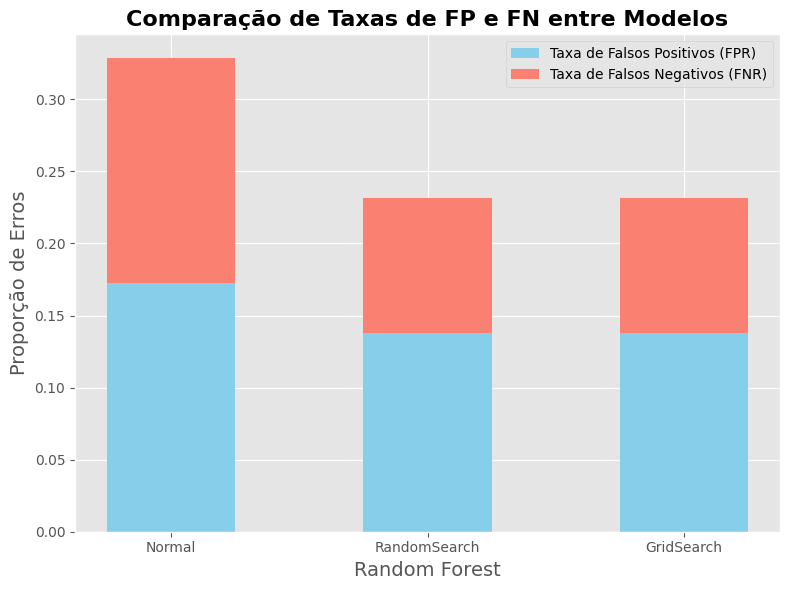

In [29]:
import numpy as np


fpr_modelos = [
    fp1 / (fp1 + tn1),
    fp2 / (fp2 + tn2),
    fp3 / (fp3 + tn3)
]

fnr_modelos = [
    fn1 / (fn1 + tp1),
    fn2 / (fn2 + tp2),
    fn3 / (fn3 + tp3)
]

modelos = ['Normal', 'RandomSearch', 'GridSearch']
cores = ['blue', 'green', 'red']

plt.style.use('ggplot')

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
bar_width = 0.5
bar_positions = np.arange(len(modelos))
plt.bar(bar_positions, fpr_modelos, color='skyblue', label='Taxa de Falsos Positivos (FPR)', width=bar_width)
plt.bar(bar_positions, fnr_modelos, bottom=fpr_modelos, color='salmon', label='Taxa de Falsos Negativos (FNR)', width=bar_width)

# Adicionar títulos e rótulos
plt.title('Comparação de Taxas de FP e FN entre Modelos', fontsize=16, fontweight='bold')

plt.xlabel('Random Forest', fontsize=14)

plt.ylabel('Proporção de Erros', fontsize=14)
plt.xticks(bar_positions, modelos)

# Adicionar uma legenda
plt.legend(loc='upper right', fontsize=10)


# Exibir o gráfico
plt.tight_layout()
plt.show()

In [31]:
print(fpr_modelos[1], fnr_modelos[1])

0.13793103448275862 0.09375


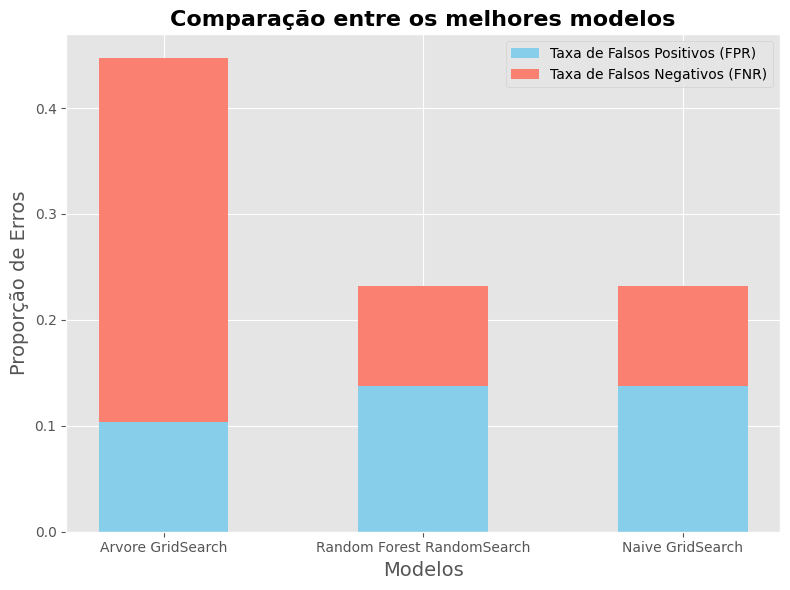

In [33]:
import matplotlib.pyplot as plt

#  grid arvore
#  random randomforest
#  naive grid

fpr_modelos = [
    0.10344827586206896,
    0.13793103448275862,
    0.13793103448275862
]

fnr_modelos = [
    0.34375,
    0.09375,
    0.09375
]

# Dados para os modelos e suas respectivas acurácias
modelos = ['Arvore GridSearch', 'Random Forest RandomSearch', 'Naive GridSearch']
cores = ['blue', 'green', 'red']

plt.style.use('ggplot')

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
bar_width = 0.5
bar_positions = np.arange(len(modelos))
plt.bar(bar_positions, fpr_modelos, color='skyblue', label='Taxa de Falsos Positivos (FPR)', width=bar_width)
plt.bar(bar_positions, fnr_modelos, bottom=fpr_modelos, color='salmon', label='Taxa de Falsos Negativos (FNR)', width=bar_width)

# Adicionar títulos e rótulos
plt.title('Comparação entre os melhores modelos', fontsize=16, fontweight='bold')

plt.xlabel('Modelos', fontsize=14)

plt.ylabel('Proporção de Erros', fontsize=14)
plt.xticks(bar_positions, modelos)

# Adicionar uma legenda
plt.legend(loc='upper right', fontsize=10)


# Exibir o gráfico
plt.tight_layout()
plt.show()